<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/7/7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.4 クラスタ数の分析
- 目的
    - エルボー法とシルエット分析を用いてクラスタ数を決定
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import matplotlib.pyplot as plt

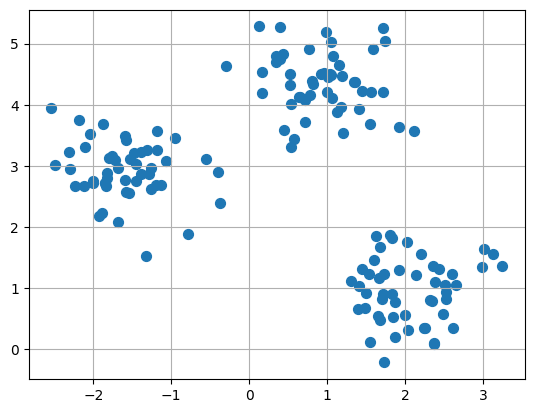

In [2]:
# データの生成と表示
X,y=make_blobs(n_samples=150,  n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X[:,0],X[:,1],marker='o',s=50)
plt.grid()
plt.show()

In [3]:
# K-meansによる分類
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)

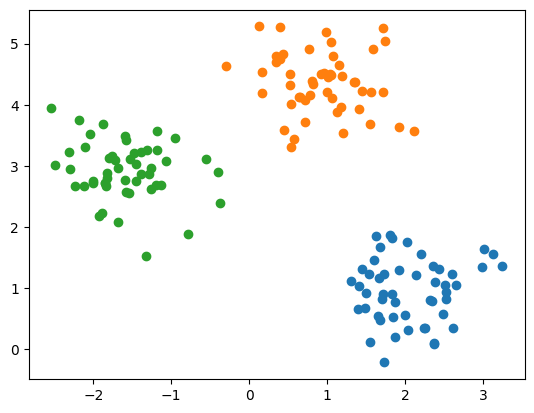

In [4]:
# クラスタリング結果の可視化
plt.scatter(X[y_km==0,0], X[y_km==0,1])
plt.scatter(X[y_km==1,0], X[y_km==1,1])
plt.scatter(X[y_km==2,0], X[y_km==2,1])
plt.show()

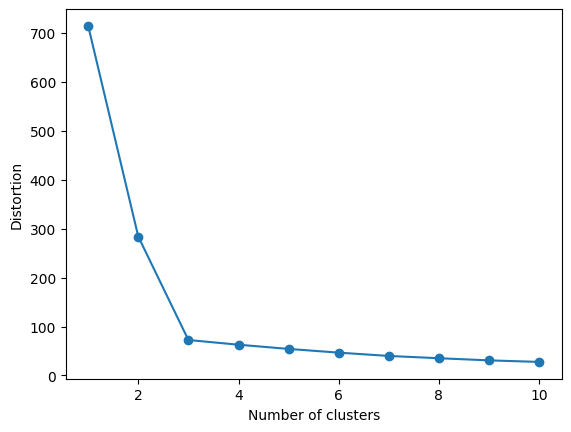

In [5]:
# クラスタ数を1〜11まで変化させ、当てはまりの良さをプロット
# 正解の3からは当てはまりの良さの変化が少なくなることが確認できる
distortions = []
for i  in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    # 当てはまりの良さ（2乗誤差を記録）
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [6]:
def plot_silhouette(X, n_clusters):
    km = KMeans(n_clusters=n_clusters)
    y_km = km.fit_predict(X)

    # シルエット係数を計算
    silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')

    y_ax_lower, y_ax_upper= 0,0
    for i,c in enumerate(range(n_clusters)):
        # 各クラスに対応するデータのシルエット係数
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()

        # 表示用のy座標のオフセット値
        y_ax_upper += len(c_silhouette_vals)
        plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0)
        y_ax_lower += len(c_silhouette_vals) 

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,color="red",linestyle="--")
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    plt.show()

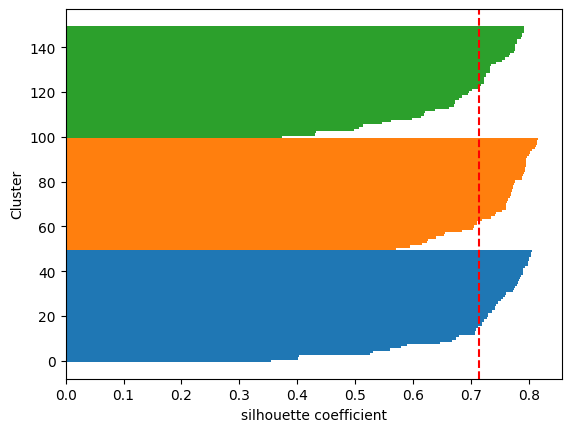

In [7]:
# クラス数3でのシルエット分析
# 縦軸が各点、横軸は各点に関して、自クラスへの点までの距離と多クラスまでの点の比率
# x方向への数値が大きいほど、他クラスへの距離が遠くなり、適切に分類出来ている
plot_silhouette(X, 3)

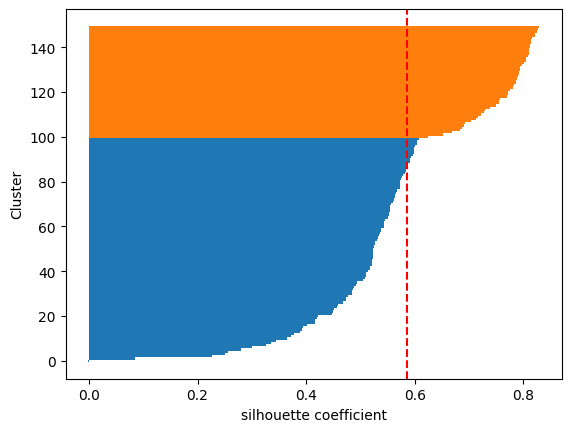

In [8]:
# クラス数2でのシルエット分析
# ２つのクラスが混ざってしまい、自クラスと多クラスの距離の差が出なくなっている
plot_silhouette(X, 2)

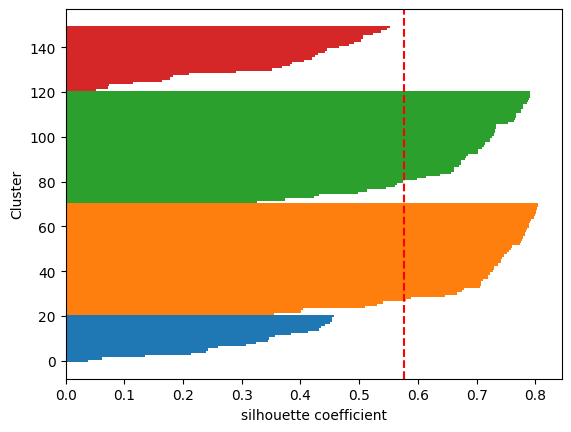

In [9]:
# クラス数4でのシルエット分析
# 1つのクラスを２つに分けてしまったため、クラス間の距離が近づいてしまう
# 結果として、自クラスと他クラスの距離の比が小さくなるクラスが発生
plot_silhouette(X, 4)